In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [2]:
df=pd.read_excel(r'C:\Users\FLUTE\Dropbox\Project\TPPS_Perf.xlsx')

In [3]:
X = df[['MUG', 'PLFC', 'AFC', 'L', 'PLFM', 'AVFM', 'CC', 'AC']]
y = df['NG']

In [4]:
X = sm.add_constant(X)  # Add a constant term to the regressors
model = sm.OLS(y, X).fit()  # Fit the Ordinary Least Squares (OLS) regression model

C:\Users\FLUTE\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [5]:
residuals = model.resid

In [ ]:
sm.qqplot(residuals, line='s')
plt.show()

In [10]:
z_scores = (residuals - residuals.mean()) / residuals.std()

In [53]:
z_scores

0      0.053271
1      0.054336
2      0.048152
3      0.083245
4      0.182833
         ...   
428    0.080794
429    0.134554
430    0.136257
431    0.152225
432    0.149248
Length: 433, dtype: float64

In [76]:
threshold=0.1
outlier_indices = np.where(np.abs(z_scores) > threshold)[0]

In [77]:
index_to_remove = 42  # Index of the value to remove
filtered_residuals = np.concatenate((residuals[:index_to_remove], residuals[index_to_remove+1:]))

C:\Users\FLUTE\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


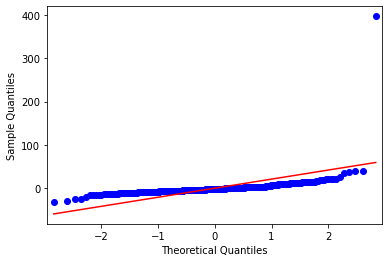

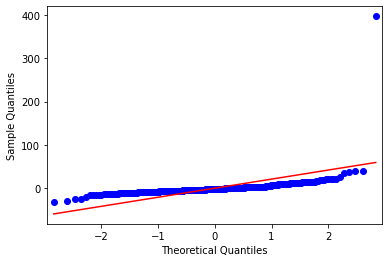

In [99]:
sm.qqplot(filtered_residuals, line='s')

In [81]:
from scipy import stats

Shapiro-Wilk test for MUG:
Statistic: 0.8549741506576538, p-value: 1.4177853727173873e-19
MUG is not normally distributed.


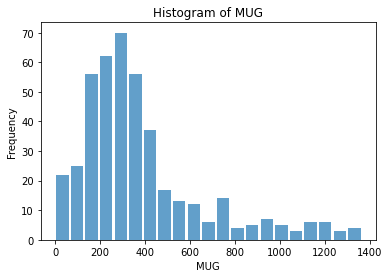

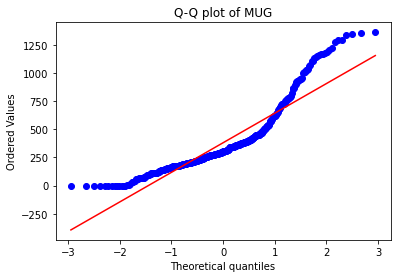

Shapiro-Wilk test for PLFC:
Statistic: 0.9405548572540283, p-value: 3.823595520063838e-12
PLFC is not normally distributed.


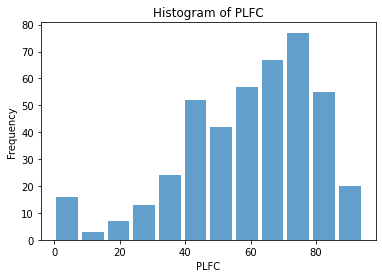

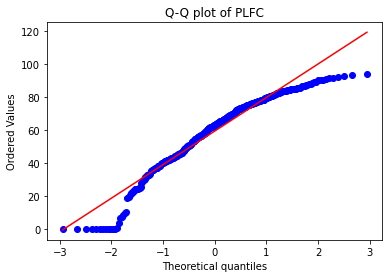

Shapiro-Wilk test for AFC:
Statistic: 0.800356388092041, p-value: 1.0356165332652719e-22
AFC is not normally distributed.


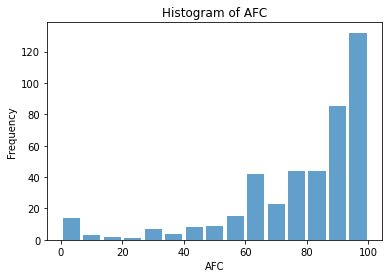

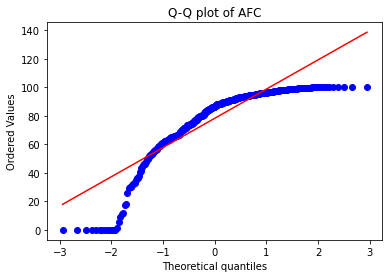

Shapiro-Wilk test for L:
Statistic: 0.7628426551818848, p-value: 1.666126493861748e-24
L is not normally distributed.


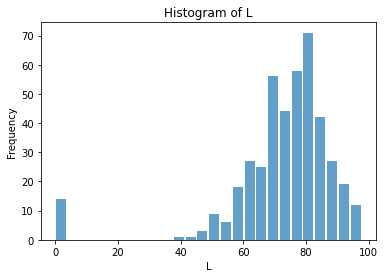

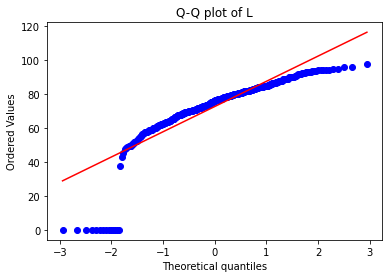

Shapiro-Wilk test for PLFM:
Statistic: 0.9517685770988464, p-value: 1.1065483945804644e-10
PLFM is not normally distributed.


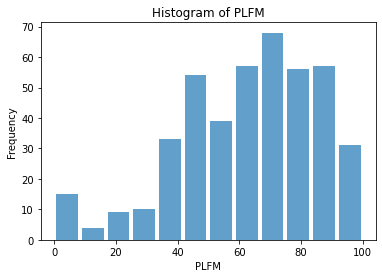

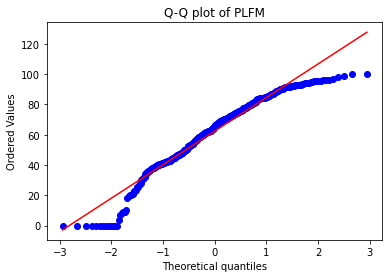

Shapiro-Wilk test for AVFM:
Statistic: 0.9411033391952515, p-value: 4.461977228670255e-12
AVFM is not normally distributed.


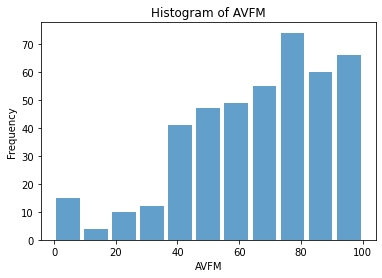

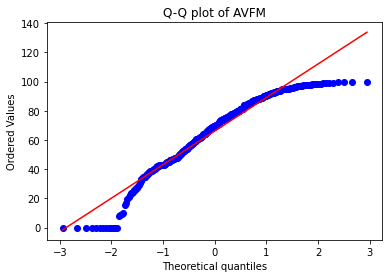

Shapiro-Wilk test for CC:
Statistic: 0.8349766731262207, p-value: 8.206748047235554e-21
CC is not normally distributed.


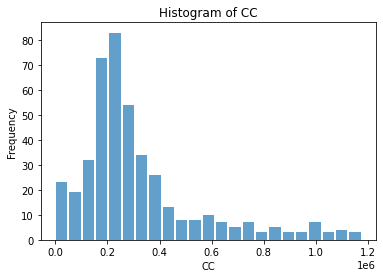

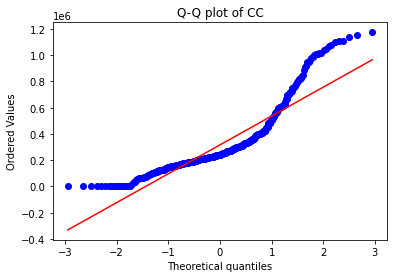

Shapiro-Wilk test for AC:
Statistic: 0.9042561054229736, p-value: 7.125546613559778e-16
AC is not normally distributed.


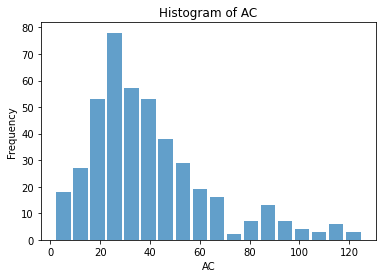

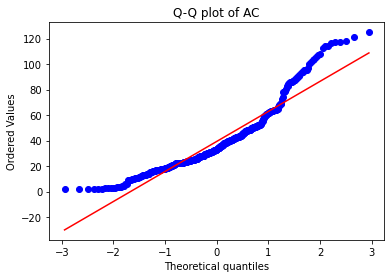

In [86]:
# Check normality assumptions for regressors
regressors = ['MUG', 'PLFC', 'AFC', 'L', 'PLFM', 'AVFM', 'CC', 'AC']
for regressor in regressors:
    # Shapiro-Wilk test
    stat, p = stats.shapiro(df[regressor])
    print(f"Shapiro-Wilk test for {regressor}:")
    print(f"Statistic: {stat}, p-value: {p}")
    if p > 0.05:
        print(f"{regressor} is normally distributed.")
    else:
        print(f"{regressor} is not normally distributed.")

    # Histogram
    plt.hist(df[regressor], bins='auto', alpha=0.7, rwidth=0.85)
    plt.xlabel(regressor)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {regressor}")
    plt.show()

    # Q-Q plot
    stats.probplot(df[regressor], dist="norm", plot=plt)
    plt.title(f"Q-Q plot of {regressor}")
    plt.show()

# Quantile Regression

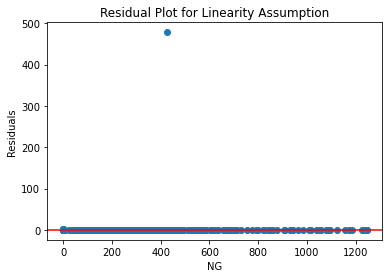

AttributeError: 'QuantRegResults' object has no attribute 'get_influence'

In [103]:
import statsmodels.formula.api as smf
# Add a constant column for the intercept
df['Intercept'] = 1

# Fit the quantile regression model
model = smf.quantreg('NG ~ MUG + PLFC + AFC + L + PLFM + AVFM + CC + AC', data=df)
result = model.fit(q=0.5)

# Verify linearity assumption: Residual plot
residuals = result.resid
plt.scatter(df['NG'], residuals)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('NG')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linearity Assumption')
plt.show()

# Verify heteroscedasticity assumption: Scale-location plot
std_residuals = result.get_influence().resid_studentized_internal
plt.scatter(df['NG'], abs(std_residuals) ** 0.5)
plt.xlabel('NG')
plt.ylabel('Sqrt(|Standardized Residuals|)')
plt.title('Scale-Location Plot for Heteroscedasticity Assumption')
plt.show()


In [104]:
import statsmodels.api as sm

df = pd.read_excel(r'C:\Users\FLUTE\Dropbox\Project\TPPS_Perf.xlsx')

# Add a constant column for the intercept
df['Intercept'] = 1

# Define the quantile levels you are interested in
quantiles = [0.25, 0.5, 0.75]

# Perform quantile regression for each quantile level
for q in quantiles:
    # Fit the quantile regression model
    model = sm.QuantReg(df['L'], df[['PLFC', 'AFC']])
    result = model.fit(q=q)

    # Print the quantile level
    print(f"\nQuantile: {q}")

    # Print the summary of the regression model
    print(result.summary())



Quantile: 0.25
                         QuantReg Regression Results                          
Dep. Variable:                      L   Pseudo R-squared:               0.4046
Model:                       QuantReg   Bandwidth:                       6.807
Method:                 Least Squares   Sparsity:                        21.72
Date:                Mon, 12 Jun 2023   No. Observations:                  433
Time:                        02:17:15   Df Residuals:                      431
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
PLFC           0.8460      0.059     14.361      0.000       0.730       0.962
AFC            0.1585      0.046      3.474      0.001       0.069       0.248

Quantile: 0.5
                         QuantReg Regression Results                          
Dep. Variable:       